        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [ ]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [1]:
import tensorflow as tf
tf.__version__

'2.3.1'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

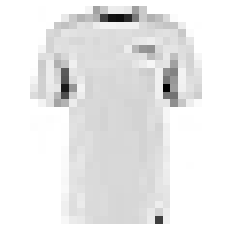

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_test[5555]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [101]:
y_test[5555]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

## Task 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from scipy.spatial.distance import cdist

In [6]:
#First we need to reshape the data into 2 dimensions. And use the PCA to reduce the dimension from 28*28 to 200.
X_train_reshaped = X_train.reshape(60000, -1)
X_test_reshaped = X_test.reshape(10000, -1)
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_reshaped)
X_test_pca = pca.fit_transform(X_test_reshaped)
X_pca = np.vstack((X_train_pca, X_test_pca))
y = np.concatenate((y_train, y_test))

In [53]:
#KNN
scoring = {'acc': 'accuracy', 'prec': 'precision_weighted', 'rec': 'recall_weighted', 'f1': 'f1_weighted'}
knn_model = KNeighborsClassifier(n_jobs=4)
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
param_grid = {'n_neighbors': [3,4,5,6,7], 'leaf_size': [5, 10, 15]}
grid = GridSearchCV(knn_model, param_grid, cv=cv, scoring=scoring, return_train_score=False, refit='f1')
grid.fit(X_train_reshaped, y_train)

print("Best parameter: ", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best parameter:  {'leaf_size': 10, 'n_neighbors': 4}
Best CV Score: 0.8625681054840069


In [110]:
#We then use the KNN with 4 neighbors to calculate the metrics
knn_model = KNeighborsClassifier(n_jobs=4, leaf_size=10, n_neighbors=4)
knn_model.fit(X_train_reshaped, y_train)
train_pred = knn_model.predict(X_train_reshaped)
test_pred = knn_model.predict(X_test_reshaped)
acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)
pre_train = precision_score(y_train, train_pred, average='weighted')
pre_test = precision_score(y_test, test_pred, average='weighted')
rec_train = recall_score(y_train, train_pred, average='weighted')
rec_test = recall_score(y_test, test_pred, average='weighted')
f1_train = f1_score(y_train, train_pred, average='weighted')
f1_test = f1_score(y_test, test_pred, average='weighted')

print("Accuracy, Precision, recall, f1 score in the in-sample data:", acc_train, pre_train, rec_train, f1_train)
print("Accuracy, Precision, recall, f1 score in the out-of-sample data:", acc_test, pre_test, rec_test, f1_test)

Accuracy, Precision, recall, f1 score in the in-sample data: 0.9082166666666667 0.910272359523773 0.9082166666666667 0.9070115673237509
Accuracy, Precision, recall, f1 score in the out-of-sample data: 0.8577 0.8603862200181598 0.8577 0.8563494820026253


In [112]:
#Decision Tree
scoring = {'acc': 'accuracy', 'prec': 'precision_weighted', 'rec': 'recall_weighted', 'f1': 'f1_weighted'}
dt_model = DecisionTreeClassifier()
param_grid = {'max_depth': [11, 12, 13, 14, 15, 16]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(dt_model, param_grid, cv=cv, return_train_score=False, scoring=scoring, refit='f1')
grid.fit(X_train_reshaped, y_train)
print("Best parameter: ", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best parameter:  {'max_depth': 13}
Best CV Score: 0.8168597595689722


In [113]:
#We will use the Decision Tree classifier with max depths of 14
dt_model = DecisionTreeClassifier(max_depth=13)
dt_model.fit(X_train_reshaped, y_train)
train_pred = dt_model.predict(X_train_reshaped)
test_pred = dt_model.predict(X_test_reshaped)
acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)
pre_train = precision_score(y_train, train_pred, average='weighted')
pre_test = precision_score(y_test, test_pred, average='weighted')
rec_train = recall_score(y_train, train_pred, average='weighted')
rec_test = recall_score(y_test, test_pred, average='weighted')
f1_train = f1_score(y_train, train_pred, average='weighted')
f1_test = f1_score(y_test, test_pred, average='weighted')


print("Accuracy, Precision, recall, f1 score in the in-sample data:", acc_train, pre_train, rec_train, f1_train)
print("Accuracy, Precision, recall, f1 score in the out-of-sample data:", acc_test, pre_test, rec_test, f1_test)


Accuracy, Precision, recall, f1 score in the in-sample data: 0.9072 0.9076339276505192 0.9072 0.9071602062276144
Accuracy, Precision, recall, f1 score in the out-of-sample data: 0.8102 0.8112384931429684 0.8102 0.8102983913072807


In [88]:
#Random Forest, it will take about 5 hrs
scoring = {'acc': 'accuracy', 'prec': 'precision_weighted', 'rec': 'recall_weighted', 'f1': 'f1_weighted'}
rf_model = RandomForestClassifier(n_jobs=4,random_state=0)
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [14,15, 16, 17], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [2,5,10]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(rf_model, param_grid, cv=cv, return_train_score=False, scoring=scoring, refit='f1')
grid.fit(X_train_reshaped, y_train)
print("Best parameter: ", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best parameter:  {'max_depth': 14, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.7282551461452436


In [32]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100, n_jobs=4)
rf_model.fit(X_train_reshaped, y_train)
train_pred = rf_model.predict(X_train_reshaped)
test_pred = rf_model.predict(X_test_reshaped)

acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)
pre_train = precision_score(y_train, train_pred, average='weighted')
pre_test = precision_score(y_test, test_pred, average='weighted')
rec_train = recall_score(y_train, train_pred, average='weighted')
rec_test = recall_score(y_test, test_pred, average='weighted')
f1_train = f1_score(y_train, train_pred, average='weighted')
f1_test = f1_score(y_test, test_pred, average='weighted')
print("Accuracy, Precision, recall, f1 score in the in-sample data:", acc_train, pre_train, rec_train, f1_train)
print("Accuracy, Precision, recall, f1 score in the out-of-sample data:", acc_test, pre_test, rec_test, f1_test)

Accuracy, Precision, recall, f1 score in the in-sample data: 0.9999833333333333 0.9999833361106482 0.9999833333333333 0.9999833333332176
Accuracy, Precision, recall, f1 score in the out-of-sample data: 0.8766 0.8755674543181434 0.8766 0.8750552061056099


In [19]:
#Neural Network
mlp_model = MLPClassifier(solver='lbfgs', random_state=0)
param_grid = {"hidden_layer_sizes": [(120,100,60), (150,80,40)], 'alpha': [0.01, 0.001, 0.0001], 'learning_rate':['adaptive'], 'learning_rate_init': [0.01, 0.001]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(mlp_model, param_grid, cv=cv, return_train_score=False, scoring=scoring, refit='f1')
grid.fit(X_train_reshaped, y_train)
print("Best parameter: ", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best parameter:  {'alpha': 0.0001, 'hidden_layer_sizes': (120, 100, 60), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01}
Best CV Score: 0.865694709904244


In [11]:
#We will use the neural network with alpha=0.0001, 3 hidden layers with size of (120,100,60), an adaptive learning rate and the initial learning rate is 0.01
mlp_model = MLPClassifier(solver='lbfgs', random_state=0, alpha=0.00001, hidden_layer_sizes=(120, 100, 80, 60), learning_rate='adaptive', learning_rate_init=0.01)
mlp_model.fit(X_train_reshaped, y_train)
train_pred = mlp_model.predict(X_train_reshaped)
test_pred = mlp_model.predict(X_test_reshaped)
acc_train = accuracy_score(y_train, train_pred)
acc_test = accuracy_score(y_test, test_pred)
pre_train = precision_score(y_train, train_pred, average='weighted')
pre_test = precision_score(y_test, test_pred, average='weighted')
rec_train = recall_score(y_train, train_pred, average='weighted')
rec_test = recall_score(y_test, test_pred, average='weighted')
f1_train = f1_score(y_train, train_pred, average='weighted')
f1_test = f1_score(y_test, test_pred, average='weighted')

print("Accuracy, Precision, recall, f1 score in the in-sample data:", acc_train, pre_train, rec_train, f1_train)
print("Accuracy, Precision, recall, f1 score in the out-of-sample data:", acc_test, pre_test, rec_test, f1_test)


Accuracy, Precision, recall, f1 score in the in-sample data: 0.8662 0.8648732116280832 0.8662 0.8650773257163351
Accuracy, Precision, recall, f1 score in the out-of-sample data: 0.8492 0.8478482452281166 0.8492 0.8480946188324815


We have trained KNerighbor classifier, Decision Tree classifier, random forest classifier and the mlp neural network. 

For the metrics, we use the accuracy score, precision, recall and f1 score on the test dataset. They are shown as follows:

|   Model   |   Accuracy   |   Precision   |   Recall   |   F1   |
| ----- | ----- | ----- | ----- | ----- |
| KNN | 0.8577 | 0.8603 | 0.8577 | 0.8563  | 
| Decision Tree | 0.8102 | 0.8112 | 0.8102 | 0.8103 | 
| Random forest | 0.8806 | 0.8797 | 0.8806 | 0.8791 | 
| MLP classifier | 0.8492 | 0.8478 | 0.8492 | 0.8481 | 

These metrics are calculated as Accuracy = (TP + TN) / (TP + FP + TN + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 = 2 \* (Recall \* Precision) / (Recall + Precision)

<font color=black size=5 face=雅黑>**From the results above, we can find that the Random Forest Classifier model is the best.**</font>


 Each metric of the random forest is the highest compared to the other three models. A higher accuracy means a higher ratio of correctly predicted observation to the total observations. And it also has the ability to find the true predicted positive observation over the total predicted positive observations of 0.6325. Besides, a higher recall means a higher ratio of correctly predicted positive observations over the all observations in actual class. In the end, f1 is the weighted average of precision and recall, it's more useful than accuracy, especially if we have an uneven class distribution. That's the reason why we use the f1 score to refit all the models when doing the gridsearch. 

## Task 2



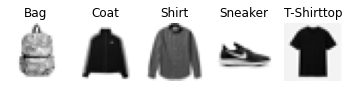

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
img1 = Image.open(r'pic/bag.jpg', 'r').convert('L').resize((28,28))
img2 = Image.open(r'pic/coat.jpg', 'r').convert('L').resize((28,28))
img3 = Image.open(r'pic/shirt.jpg', 'r').convert('L').resize((28,28))
img4 = Image.open(r'pic/sneaker.jpg', 'r').convert('L').resize((28,28))
img5 = Image.open(r'pic/T-shirttop.jpg', 'r').convert('L').resize((28,28))

plt.subplot(1,5,1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.title("Bag")

plt.subplot(1,5,2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.title("Coat")

plt.subplot(1,5,3)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.title("Shirt")

plt.subplot(1,5,4)
plt.imshow(img4, cmap='gray')
plt.axis('off')
plt.title("Sneaker")

plt.subplot(1,5,5)
plt.imshow(img5, cmap='gray')
plt.axis('off')
plt.title("T-Shirttop")
# plt.imshow()
plt.show()


In [37]:
img1_array = np.array(img1) / 255
img1_array[img1_array == 1] = 0

img2_array = np.array(img2) / 255
img2_array[img2_array == 1] = 0

img3_array = np.array(img3) / 255
img3_array[img3_array == 1] = 0

img4_array = np.array(img4) / 255
img4_array[img4_array == 1] = 0

img5_array = np.array(img5) / 255
img5_array[img5_array == 1] = 0

img1_array = np.array(img1).reshape(1,28*28)
img2_array = np.array(img2).reshape(1,28*28)
img3_array = np.array(img3).reshape(1,28*28)
img4_array = np.array(img4).reshape(1,28*28)
img5_array = np.array(img5).reshape(1,28*28)


Bag Pullover Shirt Bag Bag


<Figure size 720x720 with 0 Axes>

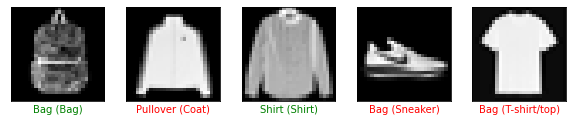

In [52]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100, n_jobs=4)
rf_model.fit(X_train_reshaped, y_train)
img1_pred = rf_model.predict(img1_array)
img2_pred = rf_model.predict(img2_array)
img3_pred = rf_model.predict(img3_array)
img4_pred = rf_model.predict(img4_array)
img5_pred = rf_model.predict(img5_array)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

img1_pred = class_names[img1_pred[0]]
img2_pred = class_names[img2_pred[0]]
img3_pred = class_names[img3_pred[0]]
img4_pred = class_names[img4_pred[0]]
img5_pred = class_names[img5_pred[0]]
print(img1_pred, img2_pred, img3_pred, img4_pred, img5_pred)


plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 5, figsize=(10, 10)) 
predict_labels = [img1_pred, img2_pred, img3_pred, img4_pred, img5_pred]
test_img = [img1, img2, img3, img4, img5]
img_names = ['Bag', 'Coat', 'Shirt', 'Sneaker', 'T-shirt/top']
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_img[i], cmap=plt.cm.binary)
    true_label = img_names[i]
    predict_label = predict_labels[i]
    if true_label in predict_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predict_label, true_label),color=color)
plt.show()

We find that the final result on my 5 pics are slightly worse than on the test dataset, the random forest model seems more likely to predict pics as bags. Maybe it comes from the uneven distribution of the dataset. 

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>